# This workbook demonstrates how to investigate the effect of uncertainty on calculated temperatures for liquid-only thermometers

In [2]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

## This sets plotting parameters

In [3]:
# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#  Example 1: Absolute errors in wt%
- input spreadsheet has absolute errors (in wt%) as column headings (e.g., from experimental studies where they report 1 sigma uncertainties)
- We want to generate N synthetic liquids for each real liquid whose parameters vary within these error bounds. 

In [4]:
# this cell loads the data, e.g., colum headings SiO2_Liq, MgO_Liq etc. 
out=pt.import_excel('Liquid_Errors.xlsx', sheet_name="Error_Example_Abs")
my_input=out['my_input']
myOls1=out['Ols']
myLiquids1=out['Liqs']

In [7]:
# This cell loads the errors, reading from columns SiO2_Liq_Err, MgO_Liq_Err etc. 
out_Err=pt.import_excel_errors('Liquid_Errors.xlsx', sheet_name="Error_Example_Abs")
myLiquids1_Err=out_Err['Liqs_Err']
myinput_Out=out_Err['my_input_Err']

In [8]:
display(myLiquids1_Err.head())
display(myLiquids1.head())

,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,Cr2O3_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3FeT_Liq_Err,NiO_Liq_Err,CoO_Liq_Err,CO2_Liq_Err,Sample_ID_Liq_Err,P_kbar_Err,T_K_Err
0,0.168800,0.094674,0.352282,0.185453,0.003443,0.423718,0.185089,0.424152,0.273896,0.007649,0.011024,0.2,0.0,0.0,0.0,0.0,0,0.1,5
1,0.273773,0.043005,0.128686,0.348039,0.062106,0.422937,0.427487,0.255009,0.455046,0.005722,0.032563,0.2,0.0,0.0,0.0,0.0,1,0.1,5
2,0.216526,0.045624,0.037117,0.368804,0.097813,0.007730,0.458202,0.160674,0.332565,0.002960,0.006635,0.2,0.0,0.0,0.0,0.0,2,0.1,5
3,0.984937,0.008604,0.125205,0.330998,0.065548,0.393717,0.369659,0.055583,0.194877,0.003742,0.001138,0.2,0.0,0.0,0.0,0.0,3,0.1,5
4,0.661858,0.053289,0.408826,0.153988,0.063849,0.192904,0.463465,0.117601,0.316096,0.006090,0.021499,0.2,0.0,0.0,0.0,0.0,4,0.1,5


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3FeT_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,P_kbar,T_K
0,57.023602,0.623106,16.332899,4.36174,0.103851,4.19180,6.94858,3.59702,0.896895,0.000000,0.226584,5.59,0.2,0.0,0.0,0.0,0,2.0,1313.15
1,57.658600,0.654150,17.194799,3.90621,0.084105,2.86892,5.91538,3.85948,1.018600,0.000000,0.214935,6.55,0.2,0.0,0.0,0.0,1,2.0,1293.15
2,60.731201,0.862054,17.144199,4.07781,0.077488,2.50867,5.22075,4.45556,1.414160,0.000000,0.319638,3.14,0.2,0.0,0.0,0.0,2,2.0,1253.15
3,61.532799,0.440860,16.508801,3.32990,0.037520,1.64150,4.34294,4.40860,1.407000,0.000000,0.215740,6.20,0.2,0.0,0.0,0.0,3,2.0,1213.15
4,52.969101,0.803412,17.563000,5.93217,0.149472,3.78351,7.65110,3.80219,0.551178,0.037368,0.196182,6.58,0.2,0.0,0.0,0.0,4,2.0,1303.15


## Use function add_noise_sample_1phase() to add sample noise and make lots of synthetic liquids
- adds noise to myLiquids1 from a normal distribution with a mean defined by the measured value of each element, and the user-entered 1 sigma value
- Specify number of re-samples per liquid using "duplicates". e.g., here, make 1000 synthetic liquids per liquid
- By default all negative numbers are replaced with zeros, but you can set Positive=False if you don't want this behavoir

In [9]:
Liquids_only_abs_noise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, phase_err=myLiquids1_Err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- Here, we can look at all 1000 of the synthetic liquids generated for the first user-entered liquid 

In [10]:
# This is saying get me rows where the sample ID=0
Liquids_only_abs_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==0]

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3FeT_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K,Sample_ID_Liq_Num
0,56.920794,0.583504,17.460023,4.324737,0.105322,4.250396,7.099114,4.109321,1.441743,0.001400,0.225300,5.358869,0.0,0.0,0.0,0.0,1.986087,1317.613727,0.0
1,57.297610,0.671670,16.504400,4.126992,0.100500,3.876133,6.998787,3.496712,1.099664,0.001464,0.232544,5.656369,0.0,0.0,0.0,0.0,1.939206,1314.182717,0.0
2,57.254795,0.549255,15.724358,4.592928,0.100957,4.063668,6.842411,3.008387,0.373803,0.000000,0.237802,5.644248,0.0,0.0,0.0,0.0,1.945067,1316.816847,0.0
3,57.264330,0.461535,17.066526,3.968334,0.101606,4.107335,7.176485,3.240131,1.055710,0.003246,0.239447,5.628155,0.0,0.0,0.0,0.0,2.038015,1317.778087,0.0
4,57.011186,0.479087,16.421758,4.115665,0.106532,3.229705,7.148403,3.917843,1.423205,0.000000,0.218460,5.632337,0.0,0.0,0.0,0.0,2.149846,1323.319983,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56.887500,0.512613,15.558308,4.568278,0.107601,2.933692,7.160991,3.787954,0.783202,0.000000,0.213972,5.923626,0.0,0.0,0.0,0.0,1.996183,1317.233531,0.0
996,57.167228,0.690500,16.514469,4.125324,0.102711,4.642646,7.328739,3.869671,0.666156,0.001507,0.220601,5.663109,0.0,0.0,0.0,0.0,2.126875,1306.758220,0.0
997,56.892829,0.553468,16.194332,4.456091,0.103476,5.129713,6.713727,4.237651,0.815245,0.000000,0.200881,5.751327,0.0,0.0,0.0,0.0,2.086149,1313.569759,0.0
998,57.367557,0.582646,16.709824,4.439481,0.105459,4.368011,7.192746,4.106654,0.331259,0.000000,0.233247,5.659273,0.0,0.0,0.0,0.0,2.099718,1309.708491,0.0


- We can plot some elements up against the user-entered 1 sigma

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


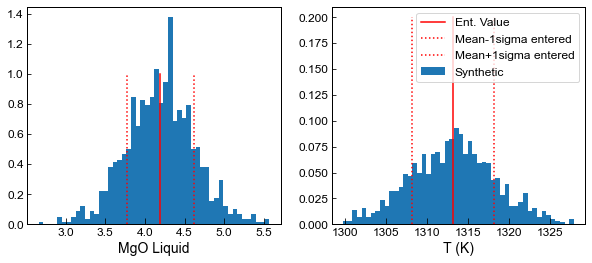

In [11]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(Liquids_only_abs_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==0, 'MgO_Liq'], bins=50, label='Synthetic', density=True)  ;
ax1.plot([myLiquids1['MgO_Liq'].iloc[0], myLiquids1['MgO_Liq'].iloc[0]], [0, 1], '-r', label='Ent. Value')
ax1.plot([myLiquids1['MgO_Liq'].iloc[0]-myLiquids1_Err['MgO_Liq_Err'].iloc[0], 
          myLiquids1['MgO_Liq'].iloc[0]-myLiquids1_Err['MgO_Liq_Err'].iloc[0]], 
         [0, 1], ':r', label='Mean-1sigma entered')
ax1.plot([myLiquids1['MgO_Liq'].iloc[0]+myLiquids1_Err['MgO_Liq_Err'].iloc[0], 
          myLiquids1['MgO_Liq'].iloc[0]+myLiquids1_Err['MgO_Liq_Err'].iloc[0]], 
         [0, 1], ':r', label='Mean+1sigma entered')
ax1.set_xlabel('MgO Liquid')

ax2.hist(Liquids_only_abs_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==0, 'T_K'], bins=50, label='Synthetic', density=True) ;
ax2.plot([myLiquids1['T_K'].iloc[0], myLiquids1['T_K'].iloc[0]], [0, 0.2], '-r', label='Ent. Value')
ax2.plot([myLiquids1['T_K'].iloc[0]-myLiquids1_Err['T_K_Err'].iloc[0], 
          myLiquids1['T_K'].iloc[0]-myLiquids1_Err['T_K_Err'].iloc[0]], 
         [0, 0.2], ':r', label='Mean-1sigma entered')
ax2.plot([myLiquids1['T_K'].iloc[0]+myLiquids1_Err['T_K_Err'].iloc[0], 
          myLiquids1['T_K'].iloc[0]+myLiquids1_Err['T_K_Err'].iloc[0]], 
         [0, 0.2], ':r', label='Mean+1sigma entered')
ax2.set_xlabel('T (K)')
ax2.legend()

## Now, input this synthetic dataframe into the functions for calculating temperature
- Here, using equation 22 of Putirka (2008), where DMg ol-liq is calculated theoretically using DMg from Beattie (1993) so this can be used as an olivine-only thermometer

In [12]:
T_noise=pt.calculate_liq_temp(liq_comps=Liquids_only_abs_noise, equationT="T_Put2008_eq22_BeattDMg", P=Liquids_only_abs_noise['P_kbar'])


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### In this plot we show the histogram for the temperature from each liquid for liquid 1, 2, 3, and 4 (for all 1000 liquids generated from it)
- All synthetic liquids generated from a single input liquid have the same value of 'Sample_ID_Liq_Num'

Text(0, 0.5, 'Probability Density')

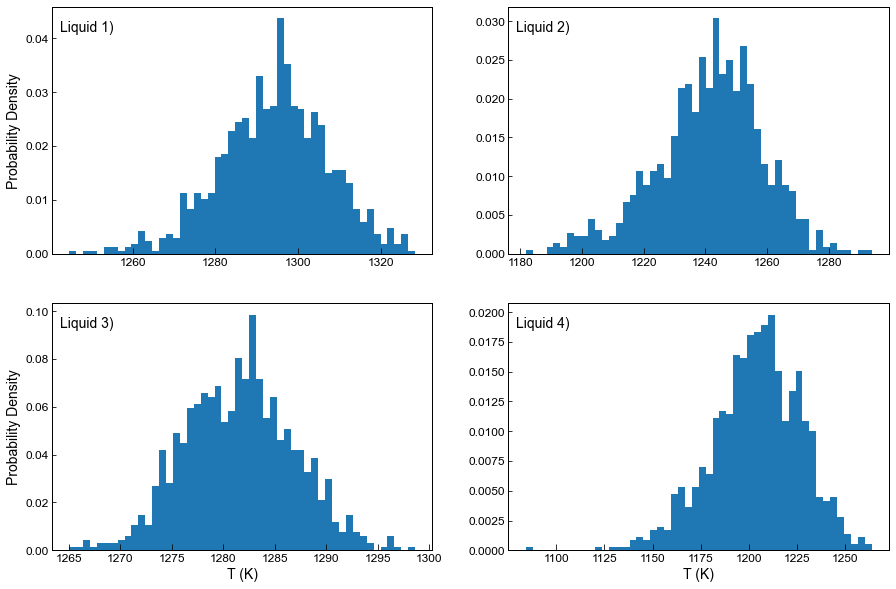

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax1.annotate("Liquid 1)", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=14)
ax1.hist(T_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==0], bins=50, density=True);
ax2.annotate("Liquid 2)", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=14)
ax2.hist(T_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==1], bins=50, density=True);
ax3.annotate("Liquid 3)", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=14)
ax3.hist(T_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==2], bins=50, density=True);
ax4.annotate("Liquid 4)", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=14)
ax4.hist(T_noise.loc[Liquids_only_abs_noise['Sample_ID_Liq_Num']==3], bins=50, density=True);
ax4.set_xlabel('T (K)')
ax3.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')

### We can also use a function to get the mean, median and standard deviation for each liquid
- The two arguements for this function are 1) The panda series you want to average (in this case, temperature)
- The panda series of values you want to average by, e.g., here averaging all samples with the same sample ID.

In [14]:
Stats_T_K=pt.av_noise_samples_series(T_noise, Liquids_only_abs_noise['Sample_ID_Liq_Num'])
Stats_T_K

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1294.147510,1295.097933,13.158899,1328.290985,1244.683869
1,1.0,1241.405567,1242.819963,17.171202,1293.907184,1181.803080
2,2.0,1281.572874,1281.670517,5.292306,1298.626886,1265.070903
3,3.0,1203.918633,1205.076334,23.119967,1263.824579,1084.164822
4,4.0,1267.958120,1268.200356,6.829375,1288.861379,1245.114054
5,5.0,1253.685749,1253.662473,3.367698,1265.545936,1243.872286
6,6.0,1244.175059,1244.286265,5.698151,1263.184289,1228.318342
7,7.0,1211.920813,1211.877373,4.121066,1227.097071,1199.346462
8,8.0,1181.708202,1181.491613,7.010164,1207.349129,1157.535564
9,9.0,1319.522278,1319.041628,9.146258,1348.662407,1289.938307


# Example 2 - Percentage Errors
- Here, in the input spreadsheet we have specified a percentage error for each input (e.g., you could estimate this from EPMA analyses of secondary standards)

In [15]:
out2=pt.import_excel('Liquid_Errors.xlsx', sheet_name="Error_Example_Perc")
my_input2=out2['my_input']
myOls2=out2['Ols']
myLiquids2=out2['Liqs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
out_Err2=pt.import_excel_errors('Liquid_Errors.xlsx', sheet_name="Error_Example_Perc")
myLiquids2_Err=out_Err2['Liqs_Err']
myinput2_Out=out_Err2['my_input_Err']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
display(myLiquids2_Err.head())

,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,Cr2O3_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3FeT_Liq_Err,NiO_Liq_Err,CoO_Liq_Err,CO2_Liq_Err,Sample_ID_Liq_Err,P_kbar_Err,T_K_Err
0,1,3,5,4,10,2,3,10,10,20,5,10,0.0,0.0,0.0,0.0,0,1,1
1,1,3,5,4,10,2,3,10,10,20,5,10,0.0,0.0,0.0,0.0,1,1,1
2,1,3,5,4,10,2,3,10,10,20,5,10,0.0,0.0,0.0,0.0,2,1,1
3,1,3,5,4,10,2,3,10,10,20,5,10,0.0,0.0,0.0,0.0,3,1,1
4,1,3,5,4,10,2,3,10,10,20,5,10,0.0,0.0,0.0,0.0,4,1,1


### This function add errors based on the dataframe Liquid2_Err which are percentage errors. 
- makes 1000 liquids per user-entered row, and assume errors are normally distributed
- Here, say Positive=False, which means it keeps negative numbers

In [19]:
Liquids_only_noise2=pt.add_noise_sample_1phase(phase_comp=myLiquids2, phase_err=myLiquids2_Err,
                                             phase_err_type="Perc", duplicates=1000, err_dist="normal", positive=False)


In [20]:
# Validation that its calculating percentage errors right, as told it to add 1% error for SiO2. This will vary a bit as you run it, as its random
Mean=np.mean(Liquids_only_noise2.loc[Liquids_only_noise2['Sample_ID_Liq_Num']==0, 'SiO2_Liq'])
std_Dev=np.nanstd(Liquids_only_noise2.loc[Liquids_only_noise2['Sample_ID_Liq_Num']==0, 'SiO2_Liq'])
100*std_Dev/Mean

1.026912246777437

## Calculating temperatures for all these synthetic liquids using equation 16 of Putirka (2008)

In [21]:
T_noise2=pt.calculate_liq_temp(liq_comps=Liquids_only_noise2, equationT="T_Put2008_eq16", P=Liquids_only_noise2['P_kbar'])

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Calculating standard deviations, means, and medians etc

In [22]:
Stats_T_K2=pt.av_noise_samples_series(T_noise2, Liquids_only_noise2['Sample_ID_Liq_Num'])
Stats_T_K2

,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1338.205114,1338.167717,21.760464,1413.512429,1282.323652
1,1.0,1260.156435,1259.534867,25.224850,1344.012019,1180.658191
2,2.0,1267.507684,1267.330619,25.988505,1363.874814,1198.365704
3,3.0,1239.972890,1240.093934,31.623164,1337.848587,1150.985239
4,4.0,1304.787266,1303.860957,16.922102,1365.970033,1239.514634
5,5.0,1287.383429,1287.208670,18.399624,1352.183508,1217.866138
6,6.0,1269.203276,1269.610645,20.890889,1326.136960,1210.697783
7,7.0,1401.290205,1401.262919,17.956894,1468.538852,1347.122428
8,8.0,1304.178234,1302.891782,20.742903,1382.773759,1240.111223
9,9.0,1357.803105,1357.497908,11.817458,1405.815408,1316.894354


# Example 3: Fixed Percentage Error
- Here, instead of inputted columns with "_Err" for each oxide, we just add a fixed percentage error to all oxides (still normally distributed) - here, 1% noise

In [23]:
out3=pt.import_excel('Liquid_Errors.xlsx', sheet_name="Error_Example_Perc")
my_input3=out3['my_input']
myOls23=out3['Ols']
myLiquids3=out3['Liqs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
Liquids_only_noise3=pt.add_noise_sample_1phase(phase_comp=myLiquids3, duplicates=1000,
                           noise_percent=1, err_dist="normal")

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
T_noise3=pt.calculate_liq_temp(liq_comps=Liquids_only_noise3, equationT="T_Put2008_eq16", P=Liquids_only_noise3['P_kbar'])

In [26]:
Stats_T_K3=pt.av_noise_samples_series(T_noise3, Liquids_only_noise3['Sample_ID_Liq_Num'])
Stats_T_K3

,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1337.722504,1337.810271,4.831677,1353.408894,1321.469150
1,1.0,1260.717100,1260.673084,5.577842,1278.353402,1245.024761
2,2.0,1266.267393,1266.133129,6.220754,1282.544794,1246.153134
3,3.0,1239.202382,1239.310096,7.229445,1259.371995,1217.293346
4,4.0,1303.896095,1303.929144,3.531835,1316.144897,1290.814048
5,5.0,1287.261729,1287.284781,4.203515,1300.193329,1274.700699
6,6.0,1268.557470,1268.516008,4.650234,1282.164115,1255.634484
7,7.0,1399.205763,1399.132229,4.088965,1412.890260,1387.087782
8,8.0,1302.831151,1302.770312,4.577796,1316.063002,1290.506146
9,9.0,1357.888685,1357.872465,2.888822,1368.848588,1348.108018


# Example 4: Perc uncertainty in a single input parameter
- Here, want to add 5% error to MgO in the liquid. You don't have to specify _Liq, it adds this based on what you entered. 

In [30]:
Liquids_only_noise4=pt.add_noise_sample_1phase(phase_comp=myLiquids1, variable="MgO", variable_err=5, 
                                              variable_err_type="Perc", duplicates=1000, err_dist="normal")


In [31]:
T_noise4=pt.calculate_liq_temp(liq_comps=Liquids_only_noise4, equationT="T_Put2008_eq16", P=Liquids_only_noise4['P_kbar'])

In [32]:
Stats_T_K4=pt.av_noise_samples_series(T_noise4, Liquids_only_noise4['Sample_ID_Liq_Num'])
Stats_T_K4

,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1337.707604,1337.709554,6.471467,1359.401870,1315.800493
1,1.0,1260.232856,1260.405055,5.508223,1278.882286,1241.253217
2,2.0,1266.206156,1266.300051,4.466984,1280.116257,1245.673797
3,3.0,1239.014493,1239.158069,3.294688,1247.849355,1228.384740
4,4.0,1303.583779,1303.884637,6.496463,1327.226194,1283.628500
5,5.0,1287.139767,1287.168607,5.751779,1305.961542,1270.141982
6,6.0,1268.598316,1268.675239,4.937058,1283.714592,1254.338661
7,7.0,1398.549992,1398.538038,7.596680,1425.345570,1371.308905
8,8.0,1302.803528,1302.848800,6.864408,1324.737504,1280.271060
9,9.0,1357.776234,1357.574510,7.990503,1383.569931,1333.627410


# Example 5: Absolute uncertainty in a given input parameter
- Here, say uncertainty in H2O content of the liquid is 1 wt%

In [34]:
Liquids_only_noise5=pt.add_noise_sample_1phase(phase_comp=myLiquids1, variable="H2O", variable_err=1, 
                                              variable_err_type="Abs", duplicates=1000, err_dist="normal")


### plot a histogram of resulting H2O distribution

Text(0, 0.5, 'Probability Density')

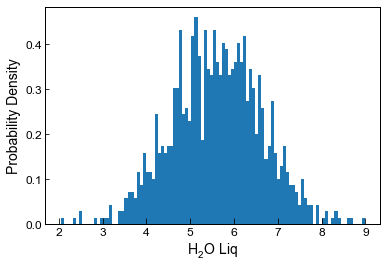

In [35]:
plt.hist(Liquids_only_noise5.loc[Liquids_only_noise4['Sample_ID_Liq_Num']==0, 'H2O_Liq'], bins=100, density= True);
plt.xlabel('H$_2$O Liq')
plt.ylabel('Probability Density')

### Now feed this into a thermometer

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'T (K)')

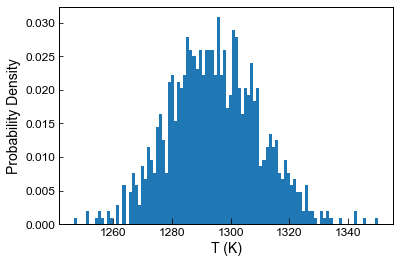

In [36]:
#Feed into a thermometer
T_noise5=pt.calculate_liq_temp(liq_comps=Liquids_only_noise5, equationT="T_Put2008_eq22_BeattDMg", 
                              P=Liquids_only_noise5['P_kbar'])
plt.hist(T_noise5.loc[Liquids_only_noise5['Sample_ID_Liq_Num']==0], bins=100, density=True);
plt.ylabel('Probability Density')
plt.xlabel('T (K)')

In [37]:
Stats_T_K5=pt.av_noise_samples_series(T_noise5, Liquids_only_noise5['Sample_ID_Liq_Num'])
Stats_T_K5

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1294.531399,1294.104195,15.190308,1350.351145,1246.450946
1,1.0,1242.394838,1242.801749,13.837198,1289.073595,1200.216851
2,2.0,1281.830240,1282.005471,14.934543,1351.443504,1241.427503
3,3.0,1205.937388,1205.968719,12.411373,1249.190806,1162.729089
4,4.0,1268.225888,1267.979834,14.136936,1308.837765,1226.374333
5,5.0,1253.530970,1253.366283,13.935523,1299.332810,1207.567710
6,6.0,1244.252444,1244.133015,13.845690,1286.177290,1197.511352
7,7.0,1212.581382,1212.087768,11.682995,1247.118809,1178.210900
8,8.0,1181.710847,1181.584719,11.607951,1225.577726,1145.600199
9,9.0,1320.347080,1320.269957,16.138431,1376.246657,1268.837205


# Example 6 - Uniformally distributed errors
- by dfeault, the code assumes a normal distribution of errors, calculated using the user-inputted 1 sigma value
- you can also state err_dist="uniform", to generate uniformly distributed noise between +-inputted value

In [40]:
Liquids_only_noise6=pt.add_noise_sample_1phase(phase_comp=myLiquids1, variable="H2O", variable_err=0.5, 
                                              variable_err_type="Abs", duplicates=1000, err_dist="uniform")


Text(0.5, 0, 'T (K)')

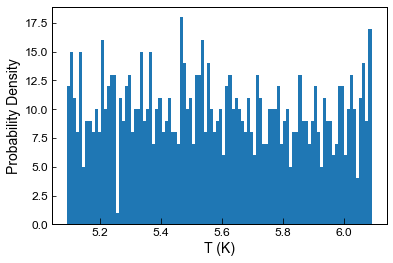

In [41]:
plt.hist(Liquids_only_noise6.loc[Liquids_only_noise6['Sample_ID_Liq_Num']==0, 'H2O_Liq'], bins=100);
plt.ylabel('Probability Density')
plt.xlabel('T (K)')